# Numpy  

- 데이터 정리 및 정리, 하위 설정 및 필터링, 변환 및 기타 모든 종류의 계산을 위한 빠른 배열 기반 작업  


- 정렬, 고유 및 집합 연산과 같은 일반적인 배열 알고리즘  


- 효율적인 기술 통계 및 데이터 집계/요약  


- 이기종 데이터 세트를 병합하고 결합하기 위한 데이터 정렬 및 관계형 데이터 조작  


- if-elif-else분기가 있는 루프 대신 배열 표현식으로 조건 논리 표현  


- 그룹별 데이터 조작(집계, 변환 및 함수 적용)

### python 대용량 데이터 배율을 효율적으로 처리 가능  


- NumPy는 내부적으로 다른 Python 내장 객체와 독립적으로 연속된 메모리 블록에 데이터를 저장함.   
- C 언어로 작성된 NumPy의 알고리즘 라이브러리는 타입 검사나 기타 오버헤드 없이 존제하는 메모리에서 동작함.  
- 또한 NumPy 배열은 Python 내장 시퀀스보다 훨씬 적은 메모리를 사용함.  


- NumPy 연산은 전체에 대해 복잡한 계산을 수행함.  
- 이는 큰 시퀀스의 경우 속도가 느릴 수 있는 Python 루프 없이 배열을 처리할 수 있음.  
- NumPy는 C 기반 알고리즘을 사용하여 일반적인 인터프리트 Python 코드에서 발생하는 오버헤드를 피하기 때문에 일반 Python 코드보다 빠름.  


In [1]:
import numpy as np
np.random.seed(12345)

import matplotlib.pyplot as plt
plt.rc("figure", figsize=(10, 6))

np.set_printoptions(precision=4, suppress=True)

In [6]:
# NumPy 기반 알고리즘은 일반적으로 Python 알고리즘보다 10~100배(혹은 그 이상) 더 빠르고 메모리 사용량도 훨씬 적음.

my_arr = np.arange(1_000_000)
my_list = list(range(1_000_000))

%timeit my_arr2 = my_arr * 2
%timeit my_list2 = [x * 2 for x in my_list]

544 μs ± 16.3 μs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
13.2 ms ± 223 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 1. NumPy ndarray: 다차원 배열 객체  

- ndarray : 대용량 데이터셋을 위한 컨테이너 (N차원 배열 객체)  
- 스칼라 간의 동등한 연산과 유사 구문을 사용하여전체 데이터 블록에 대한 수학 연산 수행 가능  
- 동일 자료형의 데이터를 위한 일반적인 컨테이너임.  


### 1.1. 배열 함수  

- ndarray.shape : 차원의 크기를 나타내는 튜플  
- ndarray.dtype : 배열의 데이터 유형을 나타내는 객체  
- ndarray.ndim : 차원을 나타내는 메소드  

- np.array(data, dtype=) : 배열 생성 > 동일 길이의 중첩 리스트는 다차원 배열로 변환됨  
- np.asarray : 입력을 ndarray로 변환. 입력이 이미 ndarray인 경우 복사하지 않음. 

- np.zeros(shape) : 0으로 구성된 배열을 주어진 길이나 모양으로 생성  
- np.zeros_like(ndarray) : 다른 배열과 동일한 shape의 0으로 구성된 배열을 생성.  

- np.ones(shape) : 1로 구성된 배열을 주어진 길이나 모양으로 생성  
- np.ones_like(ndarray) : 다른 배열과 동일한 shape의 1로 구성된 배열을 생성.  

- np.empty(shape) : 특정 값으로 초기화화지 않고 임의의 값으로 배열을 초기화  
- np.empty_like(ndarray) : 다른 배열과 동일한 shape의 임의의 값으로 구성된 배열을 생성.  

- np.full(shape, value) : 특정 값으로 구성된 배열을 주어진 길이나 모양으로 생성.  
- np.full_like(ndarray) : 다른 배열과 동일한 shape의 특정 값으로 구성된 배열을 생성.  

- np.eye(shape) : 대각선은 1이고 나머지는 0인 M * N 행렬 생성.  
- np.identity : 대각선은 1이고 나머지는 0인 정사각 행렬 생성.    

- np.arange() : ndarray 반환  

- ndarray.astype(np.dtype) : 배열의 자료형 변환 > astye 호출 시 항상 새로운 배열(복사본)이 생성됨.  


### 1.2. 배열을 사용한 산술  

- for 루프를 사용하지 않고 데이터를 변환 > 벡터화  
- 동일 크기 배열 간의 모든 산술 연산을 요소별로 다음 연산을 적용함.  
- 스칼라를 사용한 연산의 경우, 스칼라 인수를 배열의 각 요소에 적용함.  
- 동일 크키의 배열 비교 시 boolean 배열 생성됨.  

- 크키가 다른 배열 간의 연산 : broadcasting  


### 1.3. 배열 인덱싱 및 슬라이싱  

- 데이터의 하위 집합이나 개별 요소를 선택하고 싶은 경우 사용.  

- ndarray[scalar:scalar]
- 슬라이싱 객체에 값을 할당하는 경우 (arr[5:8] = 12) 원본 배열에 그대로 반영됨.  
- ⭐️ 또는, 슬라이싱 객체를 수정하는 경우에도 원본 배열에 그대로 반영됨.  
    - 반면 일반 python 객체의 경우 새로운 객체가 생성되기 때문에 원본에 그대로 반영되지 않음.  
- 인덱싱 요소를 비워두는 경우 모든 값을 가져오거나 반영함.  


- 🤔 왜 일반 python 객체와 다르게 작용하는 것인가? 
- NumPy는 매우 큰 배열을 처리할 수 있도록 설계되었음.  
- 즉, NumPy가 항상 데이터를 복사하도록 고집한다면 성능과 메모리 문제가 발생할 수 있음.  
- 따라서 원본 데이터를 유지한 상태로 다양한 뷰를 메모리에서 가져와 제공하는 것이 유용함.  
- 데이터 자체는 한번만 메모리에 할당하며, 메타데이터만 다르게 설정함. 실제 원본 데이터는 항상 떠있는 메모리의 데이터를 공유함.  
- 정리하자면,  
    - NumPy의 메모리 관리 방식:  
        - 데이터 저장: 실제 숫자들은 한 번만 메모리에 할당  
        - 뷰 생성: 메타데이터만 다르게 설정하여 다양한 접근 방식 제공  
        - 메모리 공유: 모든 뷰가 같은 데이터 블록을 참조  
        - 효율성: 데이터 복사 없이 다양한 연산 가능  
        - 비유하면:  
            - 데이터: 책의 내용 (한 번만 인쇄)  
            - 뷰: 책갈피, 목차, 색인 (같은 내용을 다르게 접근)  
            - 복사: 책을 다시 인쇄 (새로운 메모리 할당)  
    - 이렇게 NumPy는 "데이터는 한 번, 접근은 다양하게" 하는 효율적인 시스템을 제공.  

    - NumPy의 인덱싱:  
        - ✅ 뷰 생성: 메타데이터만 다르게 설정  
        - ✅ 메모리 공유: 같은 데이터 블록 참조  
        - ✅ 실시간 동기화: 수정 시 양방향 반영  
        - ✅ 메모리 효율적: 데이터 복사 없음    

    - 일반 Python의 인덱싱:  
        - ❌ 복사 생성: 새로운 객체 생성  
        - ❌ 메모리 분리: 각각 다른 메모리 영역  
        - ❌ 독립적 동작: 수정 시 서로 영향 없음  
        - ❌ 메모리 비효율적: 데이터 복사 발생
        
    - 핵심:  
        - NumPy: 인덱싱 = "같은 데이터를 다르게 보는 뷰"  
        - 일반 Python: 인덱싱 = "데이터를 복사해서 새로운 객체 생성"  
        
    - 이렇게 NumPy는 "인덱싱을 뷰 생성으로", 일반 Python은 "인덱싱을 복사 생성으로" 완전히 다르게 처리  



- 1차원 베열 인덱싱/슬라이싱 : python 리스트 객체에 대한 인덱싱과 동일하게 작용함.  
- 2차원 배열 인덱싱/슬라이싱 : ndarray[row_indexing, cloumn_indexing]  


### 1.4. 부울 인덱싱  

- 부울 인덱싱 : ndarray와 특정 스칼라 값의 비교를 통해 boolean 벡터를 받아오고, 이를 다른 ndarray의 동일 위치와 비교하여 인덱싱 연산을 수행함.  
    - 인덱싱하는 배열 축과 동일 길이의 배열이어야 함.  
    - 또는 비교 결과를 저장하는 boolean array를 만들어두고, 이를 바탕으로 인덱싱 연산을 하도록 하는 경우도 많음.  
        - 예제  
            - cond = names_array == 'Bob'  
            - numbers_array[~cond]  
    - and, or는 boolean array와 호환되지 않음. &, | 를 사용할 것.  


### 1.5. Fancy 인덱싱  

- ndarray[[row_indexing], [column_indexing]]  
- 예제  
    - arr[[1, 5, 7, 2], [0, 3, 1, 2]]  

- 일반 슬라이싱과의 차이점  
    - 일반 슬라이싱  
        - ✅ 뷰 생성: 원본과 메모리 공유  
        - ✅ 양방향 반영: 뷰 수정 → 원본 변경, 원본 수정 → 뷰 변경  
        - ✅ 메모리 효율적: 데이터 복사 없음  

    - Fancy Indexing:  
        - ❌ 복사 생성: 원본과 완전히 분리  
        - ❌ 단방향 독립: 복사된 배열 수정 → 원본 미반영  
        - ❌ 메모리 비효율적: 데이터 복사 발생  

    - 왜 이런 차이가 발생하는가?  
        - 기술적 이유  
            - 연속적 데이터: 슬라이싱은 메모리에서 연속된 부분을 선택할 수 있어 뷰 생성 가능  
            - 비연속적 데이터: Fancy indexing은 메모리에서 흩어진 위치를 선택하므로 뷰 생성 불가능  
        - 메모리 효율성  
            - 연속된 데이터는 stride(간격)만 조정하면 다양한 뷰 생성 가능  
            - 비연속된 데이터는 각각의 위치를 개별적으로 참조해야 하므로 복사가 필요    

    - 정리  
        - 일반 슬라이싱: "같은 데이터를 다르게 보는 뷰" → 메모리 공유 → 수정 시 양방향 반영  
        - Fancy Indexing: "데이터를 복사해서 새로운 객체 생성" → 메모리 분리 → 수정 시 단방향 독립    

    - 비유:  
        - 슬라이싱: 같은 사진을 다르게 자른 것 (원본 사진과 연결됨)  
        - Fancy Indexing: 사진의 일부를 복사해서 새로운 사진 만든 것 (원본과 완전히 분리됨)  


### 1.6. 배열 전치  
- ndarray.T  
- ndarray.swapaxes(0, 1)  
- 두 함수 모두 복사본을 만들지 않고 원본 데이터에 대한 뷰를 반환함.  


### 1.1. 배열 함수

In [7]:
data = np.array([[1.5, -0.1, 3], [0, -3, 6.5]])
data

array([[ 1.5, -0.1,  3. ],
       [ 0. , -3. ,  6.5]])

In [9]:
data * 10

array([[ 15.,  -1.,  30.],
       [  0., -30.,  65.]])

In [10]:
data + data

array([[ 3. , -0.2,  6. ],
       [ 0. , -6. , 13. ]])

In [12]:
data.shape

(2, 3)

In [13]:
data.dtype

dtype('float64')

In [14]:
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

array([6. , 7.5, 8. , 0. , 1. ])

In [15]:
data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

array([[1, 2, 3, 4],
       [5, 6, 7, 8]])

In [16]:
arr2.ndim
arr2.shape

(2, 4)

In [17]:
arr1.dtype
arr2.dtype

dtype('int64')

In [19]:
np.zeros(10)

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [20]:
np.zeros((3, 6))

array([[0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0.]])

In [21]:
np.empty((2, 3, 2))

array([[[0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.]]])

In [22]:
np.arange(15)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [23]:
arr1 = np.array([1, 2, 3], dtype=np.float64)
arr1.dtype

dtype('float64')

In [24]:
arr2 = np.array([1, 2, 3], dtype=np.int32)
arr2.dtype

dtype('int32')

In [25]:
arr = np.array([1, 2, 3, 4, 5])
arr.dtype

dtype('int64')

In [27]:
float_arr = arr.astype(np.float64)
float_arr.dtype

dtype('float64')

In [28]:
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [31]:
arr.astype(np.int32)
arr

array([ 3.7, -1.2, -2.6,  0.5, 12.9, 10.1])

In [33]:
# numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.string_)
numeric_strings = np.array(["1.25", "-9.6", "42"], dtype=np.bytes_)
numeric_strings

array([b'1.25', b'-9.6', b'42'], dtype='|S4')

In [34]:
numeric_strings.astype(float)

array([ 1.25, -9.6 , 42.  ])

In [35]:
int_array = np.arange(10)
calibers = np.array([.22, .270, .357, .380, .44, .50], dtype=np.float64)
int_array.astype(calibers.dtype)

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [36]:
zeros_uint32 = np.zeros(8, dtype="u4")
zeros_uint32

array([0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32)

In [37]:
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr

array([[1., 2., 3.],
       [4., 5., 6.]])

### 1.2. 배열을 이용한 산술

In [38]:
print(arr * arr)
print(arr - arr)
print(1 / arr)
print(arr ** 2)

[[ 1.  4.  9.]
 [16. 25. 36.]]
[[0. 0. 0.]
 [0. 0. 0.]]
[[1.     0.5    0.3333]
 [0.25   0.2    0.1667]]
[[ 1.  4.  9.]
 [16. 25. 36.]]


In [39]:
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])
arr2

array([[ 0.,  4.,  1.],
       [ 7.,  2., 12.]])

In [40]:
arr2 > arr

array([[False,  True, False],
       [ True, False,  True]])

### 1.3. 배열 인덱싱 및 슬라이싱

In [42]:
arr = np.arange(10)
print(arr)
print(arr[5])
print(arr[5:8])

arr[5:8] = 12
print(arr)

[0 1 2 3 4 5 6 7 8 9]
5
[5 6 7]
[ 0  1  2  3  4 12 12 12  8  9]


In [43]:
arr_slice = arr[5:8]
arr_slice

array([12, 12, 12])

In [44]:
arr_slice[1] = 12345
arr

array([    0,     1,     2,     3,     4,    12, 12345,    12,     8,
           9])

In [45]:
arr_slice[:] = 64
arr

array([ 0,  1,  2,  3,  4, 64, 64, 64,  8,  9])

In [46]:
arr2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
arr2d[2]

array([7, 8, 9])

In [48]:
print(arr2d[0][2])
print(arr2d[0, 2])

3
3


In [49]:
arr3d = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
arr3d

array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]]])

In [50]:
arr3d[0]

array([[1, 2, 3],
       [4, 5, 6]])

In [54]:
old_values = arr3d[0].copy() # 원본 값에 대한 복사본 생성

arr3d[0] = 42
print(arr3d, '\n\n')

arr3d[0] = old_values
print(arr3d)

[[[42 42 42]
  [42 42 42]]

 [[ 7  8  9]
  [10 11 12]]] 


[[[ 1  2  3]
  [ 4  5  6]]

 [[ 7  8  9]
  [10 11 12]]]


In [55]:
arr3d[1, 0]

array([7, 8, 9])

In [56]:
x = arr3d[1]
x[0]

array([7, 8, 9])

In [57]:
arr
arr[1:6]

array([ 1,  2,  3,  4, 64])

In [58]:
arr2d
arr2d[:2]

array([[1, 2, 3],
       [4, 5, 6]])

In [59]:
arr2d[:2, 1:]

array([[2, 3],
       [5, 6]])

In [62]:
lower_dim_slice = arr2d[1, :2]
lower_dim_slice.shape
lower_dim_slice

array([4, 5])

In [63]:
arr2d[:2, 2]

array([3, 6])

In [64]:
arr2d[:, :1]

array([[1],
       [4],
       [7]])

In [65]:
arr2d[:2, 1:] = 0
arr2d

array([[1, 0, 0],
       [4, 0, 0],
       [7, 8, 9]])

### 1.4. 부울 인덱싱

In [80]:
names = np.array(["Bob", "Joe", "Will", "Bob", "Will", "Joe", "Joe"])
data = np.array([[4, 7], [0, 2], [-5, 6], [0, 0], [1, 2],
                 [-12, -4], [3, 4]])
print(names, '\n\n')
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe'] 


[[  4   7]
 [  0   2]
 [ -5   6]
 [  0   0]
 [  1   2]
 [-12  -4]
 [  3   4]]


In [81]:
names == "Bob"

array([ True, False, False,  True, False, False, False])

In [82]:
data[names == "Bob"]

array([[4, 7],
       [0, 0]])

In [83]:
print(data[names == "Bob", 1:], '\n\n') # 해당 차원의 모든 요소를 선택 -> 차원 유지, 2차원 배열 반환
print(data[names == "Bob", 1]) # 해당 차원의 특정 요소를 선택 -> 차원 유지, 1차원 배열 반환

[[7]
 [0]] 


[7 0]


In [84]:
names != "Bob"
~(names == "Bob")
data[~(names == "Bob")]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [85]:
cond = names == "Bob"
data[~cond]

array([[  0,   2],
       [ -5,   6],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [86]:
mask = (names == "Bob") | (names == "Will")
mask
data[mask]

array([[ 4,  7],
       [-5,  6],
       [ 0,  0],
       [ 1,  2]])

In [87]:
data

array([[  4,   7],
       [  0,   2],
       [ -5,   6],
       [  0,   0],
       [  1,   2],
       [-12,  -4],
       [  3,   4]])

In [88]:
data[data < 0] = 0
data

array([[4, 7],
       [0, 2],
       [0, 6],
       [0, 0],
       [1, 2],
       [0, 0],
       [3, 4]])

In [89]:
data[names != "Joe"] = 7
data

array([[7, 7],
       [0, 2],
       [7, 7],
       [7, 7],
       [7, 7],
       [0, 0],
       [3, 4]])

### 1.5. Fancy Indexing

In [90]:
arr = np.zeros((8, 4))
for i in range(8):
    arr[i] = i
arr

array([[0., 0., 0., 0.],
       [1., 1., 1., 1.],
       [2., 2., 2., 2.],
       [3., 3., 3., 3.],
       [4., 4., 4., 4.],
       [5., 5., 5., 5.],
       [6., 6., 6., 6.],
       [7., 7., 7., 7.]])

In [91]:
arr[[4, 3, 0, 6]]

array([[4., 4., 4., 4.],
       [3., 3., 3., 3.],
       [0., 0., 0., 0.],
       [6., 6., 6., 6.]])

In [92]:
arr[[-3, -5, -7]]

array([[5., 5., 5., 5.],
       [3., 3., 3., 3.],
       [1., 1., 1., 1.]])

In [95]:
arr = np.arange(32).reshape((8, 4))
arr

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23],
       [24, 25, 26, 27],
       [28, 29, 30, 31]])

In [ ]:
# 행 인덱스와 열 인덱스가 매칭되어 특정 위치의 요소를 선택
# 결과는 4개의 개별 요소들
# arr[1, 0], arr[5, 3], arr[7, 1], arr[2, 2]
# 이는 1차원 배열로 반환됨

arr[[1, 5, 7, 2], [0, 3, 1, 2]]

array([ 4, 23, 29, 10])

In [ ]:
# 결과는 2차원 배열
# 4행 × 4열의 부분 배열
# 선택된 행들의 모든 열 중에서 지정된 열들만 선택

arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]]

array([[ 4,  7,  5,  6],
       [20, 23, 21, 22],
       [28, 31, 29, 30],
       [ 8, 11,  9, 10]])

In [97]:
arr[[1, 5, 7, 2], [0, 3, 1, 2]]
arr[[1, 5, 7, 2], [0, 3, 1, 2]] = 0
arr

array([[ 0,  1,  2,  3],
       [ 0,  5,  6,  7],
       [ 8,  9,  0, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22,  0],
       [24, 25, 26, 27],
       [28,  0, 30, 31]])

### 1.6. 배열 전치 및 축 교체

In [98]:
arr = np.arange(15).reshape((3, 5))
arr
arr.T

array([[ 0,  5, 10],
       [ 1,  6, 11],
       [ 2,  7, 12],
       [ 3,  8, 13],
       [ 4,  9, 14]])

In [99]:
arr = np.array([[0, 1, 0], [1, 2, -2], [6, 3, 2], [-1, 0, -1], [1, 0, 1]])
arr
np.dot(arr.T, arr)

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [100]:
arr.T @ arr

array([[39, 20, 12],
       [20, 14,  2],
       [12,  2, 10]])

In [101]:
arr
arr.swapaxes(0, 1)

array([[ 0,  1,  6, -1,  1],
       [ 1,  2,  3,  0,  0],
       [ 0, -2,  2, -1,  1]])

## 2. Pseudorandom Number Generation  

  

- numpy.random : 다양한 확률 분포에서 표본 값의 전체 배열을 생성하는 함수.  

- np.random.standard_normal(size) : 표준 정규 분포에서의 배열 생성 <-> 파이썬 내의 random 내장 모듈 대비 빠른 속도를 가짐.  

- seed  
    - generaotr의 초기 상태를 결정하는 인수.  
    - 동일 seed를 사용하면 항상 동일한 난수 시퀀스를 생성함.  
    - 프로그램을 재실행하는 경우에도 동일한 결과를 얻을 수 있음.  

- 단, 난수의 경우 생성할 때마다 난수 생성기 내부의 상태가 자동으로 업데이트됨.  
- 즉, random seed를 통해 하나의 난수 객체를 생성한 경우에도, 해당 객체를 사용할 때마다 상태가 변경되는 이슈가 존재함.  

    ```python  
    rng = np.random.default_rng(seed=12345)

    # 첫 번째 호출
    print("첫 번째:", rng.standard_normal(3))  # [0.123, 0.456, 0.789]

    # 두 번째 호출 (상태가 변경됨)
    print("두 번째:", rng.standard_normal(3))  # [0.321, 0.654, 0.987] - 다른 값!

    # 세 번째 호출 (상태가 또 변경됨)
    print("세 번째:", rng.standard_normal(3))  # [0.555, 0.777, 0.999] - 또 다른 값!
    ```  

- 이는 np.random 모듈이 전역 상태를 공유하기 때문이며, 이로 인해 다른 코드에서 np.random 사용 시 예상치 못한 결과가 발생할 수 있음.  

- 따라서, np.random.default_rng를 사용하여 필요한 객체를 동일 시드 기반으로 따로 생성하여 관리하고 사용하는 방법을 권장함.  

    ```python  
    # 실험용 데이터 생성
    rng = np.random.default_rng(seed=12345)

    # 실험 1
    experiment1_data = rng.standard_normal(100)

    # 실험 2 (같은 시드로 재시작)
    rng2 = np.random.default_rng(seed=12345)
    experiment2_data = rng2.standard_normal(100)

    # 두 실험의 결과가 동일함
    print(np.array_equal(experiment1_data, experiment2_data))  # True
    ```  

- random generator functions  

    | Method | Description |  
    |--------|-------------|  
    | permutation | 시퀀스의 무작위 순열을 반환하거나, 순열된 범위를 반환 |  
    | shuffle | 시퀀스를 제자리에서 무작위로 섞음 |  
    | uniform | 균등 분포에서 샘플을 추출 |  
    | integers | 주어진 낮은 값부터 높은 값까지의 범위에서 무작위 정수를 추출 |  
    | standard_normal | 평균 0, 표준편차 1인 정규 분포에서 샘플을 추출 |  
    | binomial | 이항 분포에서 샘플을 추출 |  
    | normal | 정규(가우시안) 분포에서 샘플을 추출 |  
    | beta | 베타 분포에서 샘플을 추출 |  
    | chisquare | 카이제곱 분포에서 샘플을 추출 |  
    | gamma | 감마 분포에서 샘플을 추출 |  
    | uniform | 균등 [0, 1) 분포에서 샘플을 추출 |

In [4]:
samples = np.random.standard_normal(size=(4, 4))
samples

array([[-2.0016, -0.3718,  1.669 , -0.4386],
       [-0.5397,  0.477 ,  3.2489, -1.0212],
       [-0.5771,  0.1241,  0.3026,  0.5238],
       [ 0.0009,  1.3438, -0.7135, -0.8312]])

In [ ]:
from random import normalvariate

N = 1_000_000
%timeit samples = [normalvariate(0, 1) for _ in range(N)] # 한번의 실행에서 한번의 샘플만을 생성
%timeit np.random.standard_normal(N) # 한번의 실행에서 여러번의 샘플을 생성

196 ms ± 1.57 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
9.57 ms ± 299 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
rng = np.random.default_rng(seed=12345)
data = rng.standard_normal((2, 3))

In [7]:
type(rng)

numpy.random._generator.Generator

In [8]:
rng = np.random.default_rng(seed=12345)

# 첫 번째 호출
print("첫 번째:", rng.standard_normal(3))  # [0.123, 0.456, 0.789]

# 두 번째 호출 (상태가 변경됨)
print("두 번째:", rng.standard_normal(3))  # [0.321, 0.654, 0.987] - 다른 값!

# 세 번째 호출 (상태가 또 변경됨)
print("세 번째:", rng.standard_normal(3))  # [0.555, 0.777, 0.999] - 또 다른 값!

첫 번째: [-1.4238  1.2637 -0.8707]
두 번째: [-0.2592 -0.0753 -0.7409]
세 번째: [-1.3678  0.6489  0.3611]


In [9]:
rng = np.random.default_rng(seed=12345)

# 실험 1
experiment1_data = rng.standard_normal(100)

# 실험 2 (같은 시드로 재시작)
rng2 = np.random.default_rng(seed=12345)
experiment2_data = rng2.standard_normal(100)

# 두 실험의 결과가 동일함
print(np.array_equal(experiment1_data, experiment2_data))  # True

True


In [10]:
# 난수 생성기 초기화
rng = np.random.default_rng(seed=12345)

# 1. permutation - 시퀀스의 무작위 순열을 반환하거나, 순열된 범위를 반환
print("=== permutation ===")
arr = np.array([1, 2, 3, 4, 5])
permuted = rng.permutation(arr)
print(f"원본: {arr}")
print(f"순열: {permuted}")

# 범위의 순열
permuted_range = rng.permutation(10)
print(f"0-9 범위 순열: {permuted_range}")

# 2. shuffle - 시퀀스를 제자리에서 무작위로 섞음
print("\n=== shuffle ===")
arr_to_shuffle = np.array([1, 2, 3, 4, 5])
print(f"섞기 전: {arr_to_shuffle}")
rng.shuffle(arr_to_shuffle)
print(f"섞은 후: {arr_to_shuffle}")

# 3. uniform - 균등 분포에서 샘플을 추출
print("\n=== uniform ===")
uniform_samples = rng.uniform(0, 10, size=5)
print(f"균등 분포 샘플 (0-10): {uniform_samples}")

# 4. integers - 주어진 낮은 값부터 높은 값까지의 범위에서 무작위 정수를 추출
print("\n=== integers ===")
int_samples = rng.integers(1, 10, size=5)
print(f"정수 샘플 (1-9): {int_samples}")

# 5. standard_normal - 평균 0, 표준편차 1인 정규 분포에서 샘플을 추출
print("\n=== standard_normal ===")
normal_samples = rng.standard_normal(5)
print(f"표준 정규 분포 샘플: {normal_samples}")

# 6. binomial - 이항 분포에서 샘플을 추출
print("\n=== binomial ===")
binomial_samples = rng.binomial(10, 0.5, size=5)
print(f"이항 분포 샘플 (n=10, p=0.5): {binomial_samples}")

# 7. normal - 정규(가우시안) 분포에서 샘플을 추출
print("\n=== normal ===")
normal_samples = rng.normal(5, 2, size=5)
print(f"정규 분포 샘플 (평균=5, 표준편차=2): {normal_samples}")

# 8. beta - 베타 분포에서 샘플을 추출
print("\n=== beta ===")
beta_samples = rng.beta(2, 5, size=5)
print(f"베타 분포 샘플 (α=2, β=5): {beta_samples}")

# 9. chisquare - 카이제곱 분포에서 샘플을 추출
print("\n=== chisquare ===")
chi_samples = rng.chisquare(3, size=5)
print(f"카이제곱 분포 샘플 (자유도=3): {chi_samples}")

# 10. gamma - 감마 분포에서 샘플을 추출
print("\n=== gamma ===")
gamma_samples = rng.gamma(2, 3, size=5)
print(f"감마 분포 샘플 (형상=2, 척도=3): {gamma_samples}")

# 11. uniform - 균등 [0, 1) 분포에서 샘플을 추출
print("\n=== uniform [0, 1) ===")
uniform_01_samples = rng.uniform(0, 1, size=5)
print(f"균등 [0, 1) 분포 샘플: {uniform_01_samples}")

=== permutation ===
원본: [1 2 3 4 5]
순열: [5 4 1 3 2]
0-9 범위 순열: [0 2 9 6 4 1 5 7 3 8]

=== shuffle ===
섞기 전: [1 2 3 4 5]
섞은 후: [1 5 3 4 2]

=== uniform ===
균등 분포 샘플 (0-10): [0.959  4.4184 8.8648 6.9745 3.2647]

=== integers ===
정수 샘플 (1-9): [7 2 7 7 2]

=== standard_normal ===
표준 정규 분포 샘플: [ 1.3223 -0.2997  0.9029 -1.6216 -0.1582]

=== binomial ===
이항 분포 샘플 (n=10, p=0.5): [6 4 3 3 5]

=== normal ===
정규 분포 샘플 (평균=5, 표준편차=2): [6.5547 6.6573 3.082  2.5812 2.1754]

=== beta ===
베타 분포 샘플 (α=2, β=5): [0.4218 0.3153 0.3682 0.4584 0.2572]

=== chisquare ===
카이제곱 분포 샘플 (자유도=3): [1.0028 0.3012 0.5313 3.5145 2.5509]

=== gamma ===
감마 분포 샘플 (형상=2, 척도=3): [2.3605 1.729  1.3201 1.8443 7.3682]

=== uniform [0, 1) ===
균등 [0, 1) 분포 샘플: [0.7599 0.2493 0.0856 0.6181 0.537 ]


## 3. Universal Functions: Fast Element-Wise Array Functions  

- ndarray에 있는 데이터의 요소별 연산  
- 하나 이상의 스칼라 값을 받아서 하나 이상의 스칼라 결과를 생성하는 함수를 간단히 벡터화하여 래퍼로 사용함.  

- unary ufunc  

    | Function | Description |  
    |----------|-------------|  
    | abs, fabs | 정수, 부동소수점 또는 복소수 값에 대해 요소별 절댓값 계산 |  
    | sqrt | 각 요소의 제곱근 계산 (arr ** 0.5와 동일) |  
    | square | 각 요소의 제곱 계산 (arr ** 2와 동일) |  
    | exp | 각 요소의 지수 ex 계산 |  
    | log, log10, log2, log1p | 각각 자연 로그(밑 e), 밑 10 로그, 밑 2 로그, log(1 + x) |   
    | sign | 각 요소의 부호 계산: 1 (양수), 0 (영), -1 (음수) |  
    | ceil | 각 요소의 천장값 계산 (즉, 그 수보다 크거나 같은 가장 작은 정수) |  
    | floor | 각 요소의 바닥값 계산 (즉, 각 요소보다 작거나 같은 가장 큰 정수) |  
    | rint | dtype을 유지하면서 요소들을 가장 가까운 정수로 반올림 |  
    | modf | 배열의 소수 부분과 정수 부분을 별도의 배열로 반환 |  
    | isnan | 각 값이 NaN(Not a Number)인지 나타내는 불린 배열 반환 |  
    | isfinite, isinf | 각 요소가 유한한지(무한대가 아니고 NaN이 아닌지) 또는 무한대인지 나타내는 불린 배열 반환 |  
    | cos, cosh, sin, sinh, tan, tanh | 일반 및 쌍곡선 삼각 함수 |  
    | arccos, arccosh, arcsin, arcsinh, arctan, arctanh | 역삼각 함수 |  
    | logical_not | 요소별로 not x의 진리값 계산 (~arr와 동일) |  

<br>
  

- binary ufuncs : 두 개의 배열을 가져와 결과로 단일 배열을 반환  
    | Function | Description |  
    |----------|-------------|  
    | add | 배열에서 해당하는 요소들을 더함 |  
    | subtract | 첫 번째 배열에서 두 번째 배열의 요소들을 뺌 |  
    | multiply | 배열 요소들을 곱함 |  
    | divide, floor_divide | 나누기 또는 바닥 나누기 (나머지 버림) |  
    | power | 첫 번째 배열의 요소들을 두 번째 배열에 표시된 거듭제곱으로 올림 |  
    | maximum, fmax | 요소별 최댓값; fmax는 NaN을 무시함 |  
    | minimum, fmin | 요소별 최솟값; fmin은 NaN을 무시함 |  
    | mod | 요소별 모듈러스 (나눗셈의 나머지) |  
    | copysign | 두 번째 인수의 부호를 첫 번째 인수의 값에 복사 |  
    | greater, greater_equal, less, less_equal, equal, not_equal | 요소별 비교를 수행하여 불린 배열 생성 (중위 연산자 >, >=, <, <=, ==, !=와 동일) |  
    | logical_and | AND (&) 논리 연산의 요소별 진리값 계산 |  
    | logical_or | OR 논리 연산의 요소별 진리값 계산 |  
    | logical_xor | XOR (^) 논리 연산의 요소별 진리값 계산 |  

    <br>

- 여러 배열을 반환하는 ufunc  
    - np.modf(arr) : 부동 소수점 배열의 정수 부분과 소수 부분을 분리하여 반환 

- argument : out : 새 배열을 만드는 대신 기존 배열에 결과를 할당할 수 있는 선택적 인수를 허용  
    - np.add(arr, 1, out=arr_name)  

In [11]:
arr = np.arange(10)
arr
np.sqrt(arr)
np.exp(arr)

array([   1.    ,    2.7183,    7.3891,   20.0855,   54.5982,  148.4132,
        403.4288, 1096.6332, 2980.958 , 8103.0839])

In [13]:
x = rng.standard_normal(8)
y = rng.standard_normal(8)
print(x)
print(y)
np.maximum(x, y)

[-0.3595 -0.7486 -0.9655  0.36   -0.2446 -1.9959 -0.1552  1.0638]
[-0.2752 -1.8533 -0.1243  0.785   0.202  -0.4281  1.8483  1.9   ]


array([-0.2752, -0.7486, -0.1243,  0.785 ,  0.202 , -0.4281,  1.8483,
        1.9   ])

In [15]:
arr = rng.standard_normal(7) * 5
print(arr)

remainder, whole_part = np.modf(arr)
print(remainder)

print(whole_part)

[-3.2675 -4.0594 -0.1277  5.7909  1.5026  0.2653  1.2864]
[-0.2675 -0.0594 -0.1277  0.7909  0.5026  0.2653  0.2864]
[-3. -4. -0.  5.  1.  0.  1.]


In [16]:
print(arr)

out = np.zeros_like(arr)
np.add(arr, 1)

np.add(arr, 1, out=out)
print(out)

[-3.2675 -4.0594 -0.1277  5.7909  1.5026  0.2653  1.2864]
[-2.2675 -3.0594  0.8723  6.7909  2.5026  1.2653  2.2864]


## 4. Array-Oriented Programming with Arrays  

- 벡터화 : 명시적인 루프를 단일 배열 표현식으로 대체하는 방식  
- 일반적인 python 연산 대비 훨씬 빠르며, 모든 종류의 수치 연산에 큰 영향을 미침  

<br>  

### 1. Expressing Conditional Logic as Array Operations  

- np.where(boolean condition, argument1, argument2)  

<br>  

### 2. Mathematical and Statistical Methods  

- n차원 배열에 대한 수학 연산 수행 : 전체 배열에 대한 연산, 특정 축(axis)을 지정한 연산  
    - axis = 0 : 열 별 연산 (각 행, 동일 열에 대한 연산)  
    - axis = 1 : 행 별 연산 (각 열, 동일 행에 대한 연산)      

        | Method | Description |  
        |--------|-------------|  
        | sum | 배열의 모든 요소 또는 축을 따라 합계; 길이가 0인 배열의 합은 0 |  
        | mean | 산술 평균; 길이가 0인 배열에서는 유효하지 않음 (NaN 반환) |  
        | std, var | 각각 표준편차와 분산 |  
        | min, max | 최솟값과 최댓값 |  
        | argmin, argmax | 각각 최솟값과 최댓값 요소의 인덱스 |  
        | cumsum | 0부터 시작하는 요소들의 누적 합계 |  
        | cumprod | 1부터 시작하는 요소들의 누적 곱 |  

<br>



In [23]:
# 1차원 배열들
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])

# meshgrid 생성
X, Y = np.meshgrid(x, y)

print("x:", x)
print("y:", y)
print("\nX 격자:")
print(X)
print("\nY 격자:")
print(Y)

x: [1 2 3]
y: [4 5 6]

X 격자:
[[1 2 3]
 [1 2 3]
 [1 2 3]]

Y 격자:
[[4 4 4]
 [5 5 5]
 [6 6 6]]


In [29]:
# 기존 방식
# 이중 반복문으로 모든 (x, y) 쌍 처리
# 개별 점에 대한 반복 연산
# for x in x_values:
#     for y in y_values:
#         z = np.sqrt(x**2 + y**2)

# meshgrid 방식
# x, y의 좌표쌍 생성
# 격자 전체에 대한 연산
points = np.arange(-5, 5, 0.01) # 100 equally spaced points
xs, ys = np.meshgrid(points, points)

# print("points\n", points, '\n')
print("xs\n", xs, '\n')
print("ys\n", ys)

# 원점에서부터 ~ 만들어진 xs, ys 좌표까지의 거리 공식
z = np.sqrt(xs ** 2 + ys ** 2)
print("z\n", z)

xs
 [[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]] 

ys
 [[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
z
 [[7.0711 7.064  7.0569 ... 7.0499 7.0569 7.064 ]
 [7.064  7.0569 7.0499 ... 7.0428 7.0499 7.0569]
 [7.0569 7.0499 7.0428 ... 7.0357 7.0428 7.0499]
 ...
 [7.0499 7.0428 7.0357 ... 7.0286 7.0357 7.0428]
 [7.0569 7.0499 7.0428 ... 7.0357 7.0428 7.0499]
 [7.064  7.0569 7.0499 ... 7.0428 7.0499 7.0569]]


<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
/var/folders/b3/l29h050d4932zk72sckd6_qh0000gn/T/ipykernel_3625/822730604.py:5: SyntaxWarning: invalid escape sequence '\s'
  plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")


Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

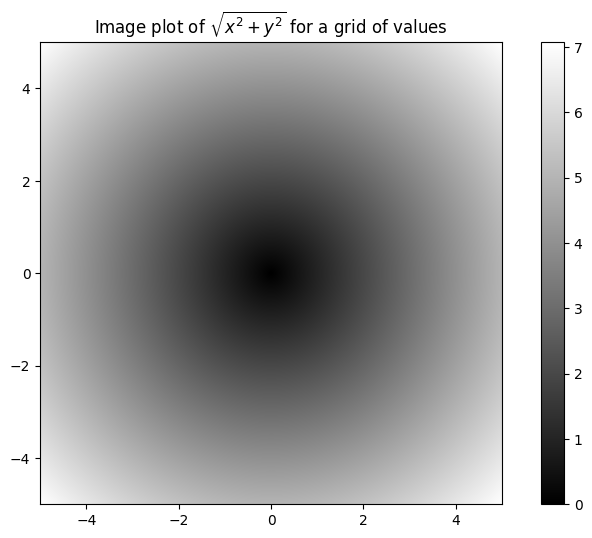

In [30]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray, extent=[-5, 5, -5, 5])
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

### 4.1. Expressing Conditional Logic as Array Operations : np.where()

In [31]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

In [32]:
# 기존 방식
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]
result

[np.float64(1.1),
 np.float64(2.2),
 np.float64(1.3),
 np.float64(1.4),
 np.float64(2.5)]

In [ ]:
# np.where 방식
result = np.where(cond, xarr, yarr)
result

array([1.1, 2.2, 1.3, 1.4, 2.5])

In [35]:
arr = rng.standard_normal((4, 4))
print("arr\n", arr, '\n')

print("arr > 0\n", arr > 0)

np.where(arr > 0, 2, -2)

arr
 [[-2.7224 -0.6733  1.2462  0.7902]
 [ 0.1753 -0.0293 -1.4195 -1.36  ]
 [ 0.2234  1.7618 -2.1709  0.6285]
 [ 0.6012  0.9508 -0.8692 -0.529 ]] 

arr > 0
 [[False False  True  True]
 [ True False False False]
 [ True  True False  True]
 [ True  True False False]]


array([[-2, -2,  2,  2],
       [ 2, -2, -2, -2],
       [ 2,  2, -2,  2],
       [ 2,  2, -2, -2]])

In [36]:
np.where(arr > 0, 2, arr) # set only positive values to 2

array([[-2.7224, -0.6733,  2.    ,  2.    ],
       [ 2.    , -0.0293, -1.4195, -1.36  ],
       [ 2.    ,  2.    , -2.1709,  2.    ],
       [ 2.    ,  2.    , -0.8692, -0.529 ]])

### 4.2. Mathematical and Statistical Methods  

| Method | Description |  
|--------|-------------|  
| sum | 배열의 모든 요소 또는 축을 따라 합계; 길이가 0인 배열의 합은 0 |  
| mean | 산술 평균; 길이가 0인 배열에서는 유효하지 않음 (NaN 반환) |  
| std, var | 각각 표준편차와 분산 |  
| min, max | 최솟값과 최댓값 |  
| argmin, argmax | 각각 최솟값과 최댓값 요소의 인덱스 |  
| cumsum | 0부터 시작하는 요소들의 누적 합계 |  
| cumprod | 1부터 시작하는 요소들의 누적 곱 |

In [40]:
arr = rng.standard_normal((5, 4))
print("arr\n", arr, '\n')

print("arr.mean()\n", arr.mean(), '\n')

print("np.mean(arr)\n", np.mean(arr), '\n')

print("arr.sum()\n", arr.sum(), '\n')

arr
 [[ 1.3975  0.292   0.6384 -0.0279]
 [ 1.3711 -2.0528  0.3805  0.7554]
 [-1.1591  2.1503 -0.1503 -0.1612]
 [-1.0794  0.878   0.2245 -0.5916]
 [ 0.2263  0.6862  1.215   0.2161]] 

arr.mean()
 0.2604423035830764 

np.mean(arr)
 0.2604423035830764 

arr.sum()
 5.208846071661529 



In [42]:
print("arr.mean(axis=1)\n", arr.mean(axis=1), '\n') # 행 별 평균

print("arr.sum(axis=0)\n", arr.sum(axis=0), '\n') # 열 별 합


arr.mean(axis=1)
 [ 0.575   0.1135  0.1699 -0.1422  0.5859] 

arr.sum(axis=0)
 [0.7562 1.9537 2.3081 0.1908] 



In [47]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])

print("arr.cumsum()\n", arr.cumsum(), '\n')
print("np.cumsum(arr)\n", np.cumsum(arr), '\n')


arr.cumsum()
 [ 0  1  3  6 10 15 21 28] 

np.cumsum(arr)
 [ 0  1  3  6 10 15 21 28] 



In [ ]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

print("arr\n", arr, '\n')
print("arr.cumsum()\n", arr.cumsum(), '\n')

arr
 [[0 1 2]
 [3 4 5]
 [6 7 8]] 

arr.cumsum()
 [ 0  1  3  6 10 15 21 28 36] 



In [46]:
print("arr.cumsum(axis=0)\n", arr.cumsum(axis=0), '\n')

print("arr.cumsum(axis=1)\n", arr.cumsum(axis=1), '\n')


arr.cumsum(axis=0)
 [[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]] 

arr.cumsum(axis=1)
 [[ 0  1  3]
 [ 3  7 12]
 [ 6 13 21]] 



### 4.3. Methods for Boolean Arrays  
  
- (ndarray boolean condition).sum() : 배열 내 특정 조건을 만족하는 요소의 수를 카운트  

- ndarray.any() : 하나라도 True가 있는지 확인  

- ndarray.all() : 모든 요소가 True인지 확인  

In [ ]:
rng = np.random.default_rng(seed=12345)

arr = rng.standard_normal(100)

print("arr\n", arr, '\n')
print((arr > 0).sum()) # The number of positive values
print((arr <= 0).sum()) # The number of non-positive values

arr
 [-1.4238  1.2637 -0.8707 -0.2592 -0.0753 -0.7409 -1.3678  0.6489  0.3611
 -1.9529  2.3474  0.9685 -0.7594  0.9022 -0.467  -0.0607  0.7888 -1.2567
  0.5759  1.399   1.3223 -0.2997  0.9029 -1.6216 -0.1582  0.4495 -1.3436
 -0.0817  1.7247  2.6182  0.7774  0.8286 -0.959  -1.2094 -1.4123  0.5415
  0.7519 -0.6588 -1.2287  0.2576  0.3129 -0.1308  1.27   -0.093  -0.0662
 -1.1082  0.136   1.3471  0.0611  0.0709  0.4337  0.2775  0.5303  0.5367
  0.6184 -0.795   0.3    -1.6027  0.2668 -1.2616 -0.0713  0.474  -0.4149
  0.0977 -1.6404 -0.8573  0.6883 -1.1545  0.6505 -1.3884 -0.9074 -1.0954
  0.0071  0.5344 -1.0658 -0.1815  1.622  -0.3174 -0.8158  0.3866 -0.2236
 -0.7017 -1.7957  0.8183 -0.571   0.0008 -1.0636  1.3017  0.7479  0.9809
 -0.1104  0.4679  0.8906  1.023   0.3124 -0.0619 -0.3595 -0.7486 -0.9655
  0.36  ] 

50
50


In [13]:
bools = np.array([False, False, True, False])
print("bools.any() : ", bools.any()) # 하나라도 True가 있는지 확인
print("bools.all() : ", bools.all()) # 모든 요소가 True인지 확인

bools.any() :  True
bools.all() :  False


### 4.4. Sorting  
  
- ndarray.sort() : 오름차순 정렬  
    - 배열의 복사본을 반환  
    - 정렬 시 원본은 변하지 않음  
    


- ndarray.sort(axis) : 인수로 받은 축을 따라 오름차순 정렬  
    - axis = 0 : 열 별 연산 (각 행, 동일 열에 대한 연산)  
    - axis = 1 : 행 별 연산 (각 열, 동일 행에 대한 연산)    
      
 

In [14]:
arr = rng.standard_normal(6)
print("arr\n", arr, '\n')

arr.sort()
print("arr.sort()\n", arr, '\n')

arr
 [-0.2446 -1.9959 -0.1552  1.0638 -0.2752 -1.8533] 

arr.sort()
 [-1.9959 -1.8533 -0.2752 -0.2446 -0.1552  1.0638] 



In [21]:
arr = rng.standard_normal((5, 3))
print("arr\n", arr, '\n')

arr.sort(axis=0)
print("arr.sort(axis=0)\n", arr, '\n')

arr.sort(axis=1)
print("arr.sort(axis=1)\n", arr, '\n')

# 정렬 순서가 바뀌는 경우
# arr.sort(axis=1)
# print("arr.sort(axis=1)\n", arr, '\n')

# arr.sort(axis=0)
# print("arr.sort(axis=0)\n", arr, '\n')

arr
 [[-0.0279  1.3711 -2.0528]
 [ 0.3805  0.7554 -1.1591]
 [ 2.1503 -0.1503 -0.1612]
 [-1.0794  0.878   0.2245]
 [-0.5916  0.2263  0.6862]] 

arr.sort(axis=0)
 [[-1.0794 -0.1503 -2.0528]
 [-0.5916  0.2263 -1.1591]
 [-0.0279  0.7554 -0.1612]
 [ 0.3805  0.878   0.2245]
 [ 2.1503  1.3711  0.6862]] 

arr.sort(axis=1)
 [[-2.0528 -1.0794 -0.1503]
 [-1.1591 -0.5916  0.2263]
 [-0.1612 -0.0279  0.7554]
 [ 0.2245  0.3805  0.878 ]
 [ 0.6862  1.3711  2.1503]] 



In [24]:
arr2 = np.array([5, -10, 7, 1, 0, -3])
sorted_arr2 = np.sort(arr2)

# np.sort() : 배열의 복사본을 반환, 원본은 변경되지 않음
print("arr2\n", arr2, '\n')
print("sorted_arr2\n", sorted_arr2, '\n')

arr2
 [  5 -10   7   1   0  -3] 

sorted_arr2
 [-10  -3   0   1   5   7] 



### 4.5. Unique and Other Set Logic  

- np.unique(ndarray) : 넘파이 배열에서 유니크한 요소만 정렬된 형태로 반환  
    - python 내장 함수인 sorted(set(array))와 동일한 결과를 반환하지만, 속도가 빠르며 넘파이 배열을 반환함.  

- np.in1d(ndarray1, ndarray2) : 첫 번째 배열의 요소가 두번째 배열에 속하는 값인지 확인하는 함수. Boolean 값을 반환함. -> 현재는 deprecated된 함수이며, np.isin() 함수로 변경됨. 

    | Method | Description |  
    |--------|-------------|  
    | unique(x) | x에서 정렬된 고유한 요소들을 계산 |  
    | intersect1d(x, y) | x와 y에서 정렬된 공통 요소들을 계산 |  
    | union1d(x, y) | 요소들의 정렬된 합집합을 계산 |  
    | in1d(x, y) | x의 각 요소가 y에 포함되어 있는지 나타내는 불린 배열을 계산 |  
    | setdiff1d(x, y) | 집합 차이, x에는 있지만 y에는 없는 요소들 |  
    | setxor1d(x, y) | 집합 대칭 차이; 두 배열 중 하나에만 있고 둘 다에는 없는 요소들 |

In [2]:
names = np.array(["Bob", "Will", "Joe", "Bob", "Will", "Joe", "Joe"])
np.unique(names)

array(['Bob', 'Joe', 'Will'], dtype='<U4')

In [3]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])
np.unique(ints)

array([1, 2, 3, 4])

In [4]:
sorted(set(names))

[np.str_('Bob'), np.str_('Joe'), np.str_('Will')]

In [5]:
values = np.array([6, 0, 0, 3, 2, 5, 6])
np.in1d(values, [2, 3, 6])

/var/folders/b3/l29h050d4932zk72sckd6_qh0000gn/T/ipykernel_4785/1293837718.py:2: DeprecationWarning: `in1d` is deprecated. Use `np.isin` instead.
  np.in1d(values, [2, 3, 6])


array([ True, False, False,  True,  True, False,  True])

## 5. File Input and Output with Arrays  

- NumPy는 일부 텍스트 또는 바이너리 형식으로 디스크에 데이터를 저장하고 로드할 수 있음.  

    - np.save(file_path, ndarray) : 배열은 raw binary 포맷으로 저장. 저장되는 파일은 .npy 파일  
        - np.savez(file_path, ndarray1, ndarray2) : 여러 배열을 저장하는 경우 사용, 저장되는 파일은 .npz 파일이며 각 배열에 대해서는 딕셔너리처럼 key 값으로 접근.  
            - 속도 우선  
            - 빠른 저장/로드가 중요할 때  
            - 메모리가 충분할 때  
            - 임시 파일이나 작은 데이터일 때

        - np.savez_compressed(file_path, ndarray1, ndarray2) : 압축된 배열을 저장하는 경우 사용.  
            - 메모리 우선
            - 파일 크기가 중요할 때  
            - 디스크 공간이 제한적일 때  
            - 장기 저장이나 배포용 파일일 때
        
    - np.load(file_path) : 저장된 파일을 로드할 때 사용.  
    

In [6]:
arr = np.arange(10)
np.save("some_array", arr)

In [7]:
np.load("some_array.npy")

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
np.savez("array_archive.npz", a=arr, b=arr)

In [9]:
arch = np.load("array_archive.npz")
arch["b"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.savez_compressed("arrays_compressed.npz", a=arr, b=arr)

In [11]:
arch_compressed = np.load("arrays_compressed.npz")
arch_compressed["a"]

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
!rm some_array.npy
!rm array_archive.npz
!rm arrays_compressed.npz

## 6. Linear Algebra  

- 두 개의 배열을 곱하는 것은 단순한 요소별 곱인 반면에, 행렬곱을 위해서는 numpy 함수 사용이 필요함.  

- Matrix multiplication : np.dot(ndarray1, ndarray2) = ndarray1.dot(ndarray2) = @  

    - 2차원 배열 dot 1차원 베열 = 1차원 배열  

    - NumPy는 1차원 배열을 "벡터"로 취급하여, 행렬-벡터 곱의 결과를 1차원으로 축소시킴. (2x3) dot (3,) = (2,)  

        - 차원 확인: A의 열 수 = v의 길이  
        
        - 내부 변환: v를 (3,1)로 변환  

        - 행렬 곱: (2,3) @ (3,1) = (2,1)  

        - 차원 축소: (2,1) → (2,)  

        - 결과 반환: 1차원 배열  

- numpy.linalg : decomposition을 위한 함수 세트 : inverse(역행렬), determinant(행렬식 : 행렬이 역행렬을 가질 수 있는가?)  

    <br>  


    | Function | Description |  
    |----------|-------------|  
    | diag | 정사각 행렬의 대각선(또는 비대각선) 요소들을 1차원 배열로 반환하거나, 1차원 배열을 비대각선이 0인 정사각 행렬로 변환 |  
    | dot | 행렬 곱셈 |  
    | trace | 대각선 요소들의 합을 계산 |  
    | det | 행렬의 행렬식을 계산 |  
    | eig | 정사각 행렬의 고유값과 고유벡터를 계산 |  
    | inv | 정사각 행렬의 역행렬을 계산 |  
    | pinv | 행렬의 무어-펜로즈 유사역행렬을 계산 |  
    | qr | QR 분해를 계산 |  
    | svd | 특이값 분해(SVD)를 계산 |  
    | solve | 정사각 행렬 A에 대해 선형 시스템 Ax = b의 해 x를 구함 |  
    | lstsq | Ax = b의 최소제곱해를 계산 |


In [13]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
y = np.array([[6., 23.], [-1, 7], [8, 9]])

print("x\n", x, '\n')
print("y\n", y, '\n')
print("x.dot(y)\n", x.dot(y), '\n')

x
 [[1. 2. 3.]
 [4. 5. 6.]] 

y
 [[ 6. 23.]
 [-1.  7.]
 [ 8.  9.]] 

x.dot(y)
 [[ 28.  64.]
 [ 67. 181.]] 



In [14]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

In [24]:
# np.shape(np.ones(3)) = (3,) # 1차원 벡터
# NumPy는 1차원 배열을 "벡터"로 취급하여, 행렬-벡터 곱의 결과를 1차원으로 축소시킴.

print("x.shape : ", x.shape, '\n')
print("np.ones(3).shape : ", np.ones(3).shape, '\n')
print("x @ np.ones(3) : ", x @ np.ones(3), '\n')
print("result shape : ", np.shape(x @ np.ones(3)))    # (2, 1)

x.shape :  (2, 3) 

np.ones(3).shape :  (3,) 

x @ np.ones(3) :  [ 6. 15.] 

result shape :  (2,)


In [28]:
from numpy.linalg import inv, qr

X = rng.standard_normal((5, 5))

mat = X.T @ X

print("mat\n", mat, '\n')

print("inv(mat)\n", inv(mat), '\n')

print("mat @ inv(mat)\n", mat @ inv(mat), '\n')

mat
 [[ 1.3646 -1.1258 -1.7566 -0.7867  0.6673]
 [-1.1258  5.0623  2.2181  1.5241 -1.9703]
 [-1.7566  2.2181  3.2727  1.7339 -1.3366]
 [-0.7867  1.5241  1.7339  2.4527 -1.0718]
 [ 0.6673 -1.9703 -1.3366 -1.0718  2.4394]] 

inv(mat)
 [[ 2.4513 -0.0194  1.4516 -0.223   0.0111]
 [-0.0194  0.3396 -0.1485 -0.0317  0.1843]
 [ 1.4516 -0.1485  1.4476 -0.4268  0.0886]
 [-0.223  -0.0317 -0.4268  0.7066  0.112 ]
 [ 0.0111  0.1843  0.0886  0.112   0.6535]] 

mat @ inv(mat)
 [[ 1.  0. -0.  0.  0.]
 [-0.  1. -0. -0. -0.]
 [ 0. -0.  1. -0. -0.]
 [ 0.  0.  0.  1. -0.]
 [-0.  0. -0.  0.  1.]] 



## 7. Random Walks  

In [38]:
import random

position = 0 # 시작 위치 (원점)
walk = [position] # 위치 변화를 기록할 리스트 (시작 위치 포함)
nsteps = 1000  # 총 걸음 수

for _ in range(nsteps): # 반복문에서 인덱스가 필요 없는 경우 _로 명시
    step = 1 if random.randint(0, 1) else -1 # 랜던 시뮬레이션 결과가 1이면 step = 1, 0이면 step = -1
    # step = 1 if random.randint(0, 1) > 0 else -1
    position += step # position = step의 누적합
    walk.append(position) # 새로운 위치를 walk 리스트에 추가


In [39]:
plt.figure()

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

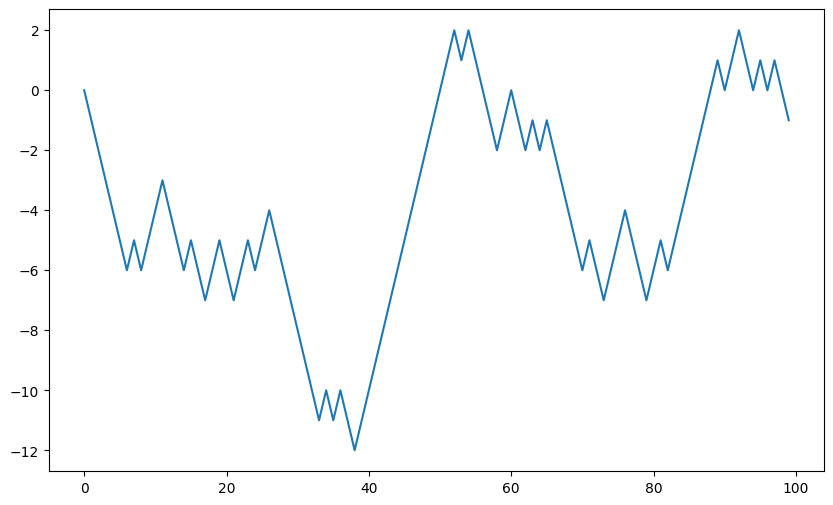

In [40]:
plt.plot(walk[:100])

#### with numpy

In [ ]:
nsteps = 1000
rng = np.random.default_rng(seed=12345)  # fresh random generator

draws = rng.integers(0, 2, size=nsteps) # 0 또는 1을 nsteps개 생성 (동전 던지기 시뮬레이션)
steps = np.where(draws == 0, 1, -1) # 0이면 1, 1이면 -1로 변환
walk = steps.cumsum() # 누적 합계를 계산하여 각 시점에서의 위치를 구함

In [46]:
print("walk.min() : ", walk.min())
print("walk.max() : ", walk.max())

walk.min() :  -8
walk.max() :  50


In [48]:
# 랜덤 워크가 특정 값에 도달하는 단계 구하기

# 원점에서 어느 방향으로든 최소 10걸음 이상 멀어지는 데 무작위 보행이 얼마나 오래 걸렸는지 알고 싶음. 
# np.abs(walk) >= 10은 걷기가 10에 도달하거나 초과한 위치를 나타내는 부울 배열을 제공

# 이 때, 처음 10 또는 -10의 인덱스를 원하는 상황이라면?
# 부울 배열에서 최대값(=TRUE)의 첫 번째 인덱스를 반환하는 argmax를 사용하여 이를 계산 가능함.

print("(np.abs(walk) >= 10).argmax() : ", (np.abs(walk) >= 10).argmax())

(np.abs(walk) >= 10).argmax() :  155


In [ ]:
nwalks = 5000 # 시뮬레이션할 랜덤 워크의 개수
nsteps = 1000 # 각 워크의 걸음 수

draws = rng.integers(0, 2, size=(nwalks, nsteps)) # 5000개 워크 × 1000걸음 크기의 2차원 배열에 0 또는 1을 랜덤하게 생성
steps = np.where(draws > 0, 1, -1) # 0보다 크면 1(오른쪽), 그렇지 않으면 -1(왼쪽)로 변환

walks = steps.cumsum(axis=1) # 각 워크의 누적 합계를 계산하여 위치 변화를 구함 (axis=1: 행 방향으로 누적, 5000개의 walk, 1000개의 step)
walks # 결과: 5000개 워크의 각 시점에서의 위치를 담은 2차원 배열

array([[  1,   2,   3, ...,  22,  23,  22],
       [  1,   0,  -1, ..., -50, -49, -48],
       [  1,   2,   3, ...,  50,  49,  48],
       ...,
       [ -1,  -2,  -1, ..., -10,  -9, -10],
       [ -1,  -2,  -3, ...,   8,   9,   8],
       [ -1,   0,   1, ...,  -4,  -3,  -2]], shape=(5000, 1000))

In [52]:
print("draws.shape : ", draws.shape)
print("steps.shape : ", steps.shape)
print("walks.shape : ", walks.shape)

draws.shape :  (5000, 1000)
steps.shape :  (5000, 1000)
walks.shape :  (5000, 1000)


In [51]:
print("walks.max() : ", walks.max())
print("walks.min() : ", walks.min())

walks.max() :  114
walks.min() :  -120


In [ ]:
# 모든 walk에 30 이상의 거리가 없을 수 있기 때문에, 각 walk를 기준으로 포함 여부를 판단(행별 확인)
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False,  True,  True, ...,  True, False,  True], shape=(5000,))

In [54]:
hits30.sum() # Number that hit 30 or -30

np.int64(3395)

In [56]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([201, 491, 283, ..., 219, 259, 541], shape=(3395,))

In [57]:
crossing_times.mean()

np.float64(500.5699558173785)

In [ ]:
# 다른 확률 분포를 사용하여 테스트

nwalks = 5000 # 시뮬레이션할 랜덤 워크의 개수
nsteps = 1000 # 각 워크의 걸음 수

draws = 0.25 * rng.standard_normal((nwalks, nsteps)) # 5000개 워크 × 1000걸음 크기의 2차원 배열에 0 또는 1을 랜덤하게 생성
steps = np.where(draws > 0, 1, -1) # 0보다 크면 1(오른쪽), 그렇지 않으면 -1(왼쪽)로 변환

walks = steps.cumsum(axis=1) # 각 워크의 누적 합계를 계산하여 위치 변화를 구함 (axis=1: 행 방향으로 누적, 5000개의 walk, 1000개의 step)
walks # 결과: 5000개 워크의 각 시점에서의 위치를 담은 2차원 배열

array([[  1,   2,   1, ..., -16, -15, -16],
       [  1,   0,   1, ...,  10,   9,   8],
       [ -1,   0,  -1, ..., -60, -59, -58],
       ...,
       [ -1,   0,  -1, ..., -70, -71, -70],
       [  1,   0,  -1, ..., -24, -23, -22],
       [  1,   2,   1, ..., -14, -15, -14]], shape=(5000, 1000))

In [60]:
print("draws.shape : ", draws.shape)
print("steps.shape : ", steps.shape)
print("walks.shape : ", walks.shape)

draws.shape :  (5000, 1000)
steps.shape :  (5000, 1000)
walks.shape :  (5000, 1000)


In [61]:
print("walks.max() : ", walks.max())
print("walks.min() : ", walks.min())

walks.max() :  112
walks.min() :  -118


In [62]:
# 모든 walk에 30 이상의 거리가 없을 수 있기 때문에, 각 walk를 기준으로 포함 여부를 판단(행별 확인)
hits30 = (np.abs(walks) >= 30).any(axis=1)
hits30

array([False, False,  True, ...,  True,  True, False], shape=(5000,))

In [63]:
hits30.sum() # Number that hit 30 or -30

np.int64(3402)

In [64]:
crossing_times = (np.abs(walks[hits30]) >= 30).argmax(axis=1)
crossing_times

array([367, 589, 221, ..., 413, 649, 311], shape=(3402,))

In [65]:
crossing_times.mean()

np.float64(502.5537918871252)